**DS 301: Applied Data Modeling and Predictive Analysis**

# Lab 7 – Decision Trees

Nok Wongpiromsarn, 10 August 2022

**Credit:** https://github.com/asukul/DS301-f19/blob/master/Lab4_Decision_Tree_Divorce_Predictor_v2.ipynb by Adisak Sukul

**Read the data**

In [1]:
import os
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

data_path = os.path.join("datasets", "divorce.csv")
df = pd.read_csv(data_path)
df.head(10)

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
5,0,0,1,0,0,2,0,0,0,1,...,2,2,1,2,1,1,1,2,0,1
6,3,3,3,2,1,3,4,3,2,2,...,3,2,3,2,3,3,2,2,2,1
7,2,1,2,2,2,1,0,3,3,2,...,0,1,2,2,2,1,1,1,0,1
8,2,2,1,0,0,4,1,3,3,3,...,1,1,1,1,1,1,1,1,1,1
9,1,1,1,1,1,2,0,2,2,2,...,2,0,2,2,2,2,4,3,3,1


In [2]:
df.columns

Index(['Atr1', 'Atr2', 'Atr3', 'Atr4', 'Atr5', 'Atr6', 'Atr7', 'Atr8', 'Atr9',
       'Atr10', 'Atr11', 'Atr12', 'Atr13', 'Atr14', 'Atr15', 'Atr16', 'Atr17',
       'Atr18', 'Atr19', 'Atr20', 'Atr21', 'Atr22', 'Atr23', 'Atr24', 'Atr25',
       'Atr26', 'Atr27', 'Atr28', 'Atr29', 'Atr30', 'Atr31', 'Atr32', 'Atr33',
       'Atr34', 'Atr35', 'Atr36', 'Atr37', 'Atr38', 'Atr39', 'Atr40', 'Atr41',
       'Atr42', 'Atr43', 'Atr44', 'Atr45', 'Atr46', 'Atr47', 'Atr48', 'Atr49',
       'Atr50', 'Atr51', 'Atr52', 'Atr53', 'Atr54', 'Class'],
      dtype='object')

In [3]:
# Separate the data into labels and features

X = df.loc[:, df.columns != 'Class']
y = df['Class']

In [4]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split # Import train_test_split function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44) # 70% training and 30% test

In [5]:
# Train the Decision Tree classifier on the training set and make prediction on the test sets
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [6]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy: 1.0


[Text(0.6666666666666666, 0.875, 'X[8] <= 1.5\ngini = 0.499\nsamples = 119\nvalue = [62, 57]'),
 Text(0.5, 0.625, 'X[25] <= 1.5\ngini = 0.088\nsamples = 65\nvalue = [62, 3]'),
 Text(0.3333333333333333, 0.375, 'X[2] <= 3.5\ngini = 0.031\nsamples = 63\nvalue = [62, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 62\nvalue = [62, 0]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 54\nvalue = [0, 54]')]

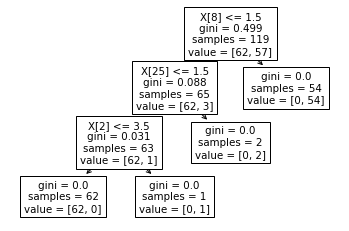

In [7]:
# Plot tree
from sklearn import tree

tree.plot_tree(clf.fit(X_train, y_train))

In [8]:
# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(clf,
                              out_file=f,
                              max_depth = 20,
                              impurity = True,
                              feature_names = list(df.drop(['Class'], axis=1)),
                              class_names = ['Potential divorce', 'Healthy Marriage'],
                              rounded = True,
                              filled= True )

In [9]:
# Optional: Convert .dot to .png.
# This requires graphviz.
from subprocess import check_call

check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

0

In [10]:
# Train the Random Forest classifier on the training set and make prediction on the test sets
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest classifer object
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)

# Train Random Forest Classifer
rnd_clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_rf = rnd_clf.predict(X_test)

In [11]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))

Accuracy: 0.9803921568627451
